# How the code is organized

The code is provided in 2 sections:

**Section 1:** Red Wine Analysis, Model Creation and Saving

**Section 2:** White Wine Analysis, Model Creation and Saving

For deployment, refer to the Flask application under the `deployment` folder

In [1]:
#import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Section 1 - Linear Regression for Red Wine Quality

In [2]:
# read the dataset

red_wine_data = pd.read_csv('datasets/winequality-red.csv', delimiter =';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Develop an ML Model for Red Wine

Developing an ML model involves a number of steps.

Let us adopt the following Machine Learning Pipeline:

1. Sanity Check 
2. EDA/Preprocessing
3. Feature Engineering
4. Model Building
5. Model Saving
6. Model Deployment - this is covered under the `deployment` folder

Once the model is deployed, the pipeline extends to include the below steps:

7. Model in Production
8. Observe model behaviour
9. Obtain updated datasets
10. Redo steps 1..9 if required

_Note: these extended steps are not covered in this exercise_

### Sanity Check

1. Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem
2. Datatypes: Check whether all the columns in the given dataset is numeric
3. Missing Values: Check whether there are missing values
4. Zero-variance: Check if there are any zero variance column in the dataset
5. Range of numbers in each column: Check if the column values within the dataset are in the same magnitude
6. Correlation: Check correlation between feature columns & target
7. Target: Check for discrete values

In [3]:
# 1 Shape
red_wine_data.shape

(1599, 12)

In [4]:
# 2 Datatypes
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# 3 Missing values
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# 4 Identify zero variance columns
for col in red_wine_data:
    print(col, red_wine_data[col].value_counts().count())

fixed acidity 96
volatile acidity 143
citric acid 80
residual sugar 91
chlorides 153
free sulfur dioxide 60
total sulfur dioxide 144
density 436
pH 89
sulphates 96
alcohol 65
quality 6


In [7]:
# 5. Range of numbers in each column
for i in red_wine_data.columns:
    print("Range of {}: minimum {} & maximum {} " .format(i, red_wine_data[i].min(), red_wine_data[i].max()))

Range of fixed acidity: minimum 4.6 & maximum 15.9 
Range of volatile acidity: minimum 0.12 & maximum 1.58 
Range of citric acid: minimum 0.0 & maximum 1.0 
Range of residual sugar: minimum 0.9 & maximum 15.5 
Range of chlorides: minimum 0.012 & maximum 0.611 
Range of free sulfur dioxide: minimum 1.0 & maximum 72.0 
Range of total sulfur dioxide: minimum 6.0 & maximum 289.0 
Range of density: minimum 0.9900700000000001 & maximum 1.00369 
Range of pH: minimum 2.74 & maximum 4.01 
Range of sulphates: minimum 0.33 & maximum 2.0 
Range of alcohol: minimum 8.4 & maximum 14.9 
Range of quality: minimum 3 & maximum 8 


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

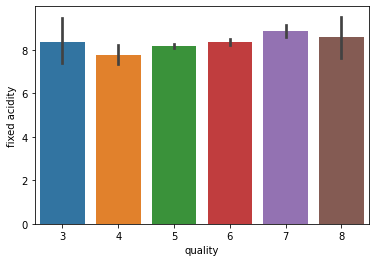

In [8]:
# 6 Relationship between features & the target
# check how the quality is influenced by fixed acidity
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['fixed acidity'])

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

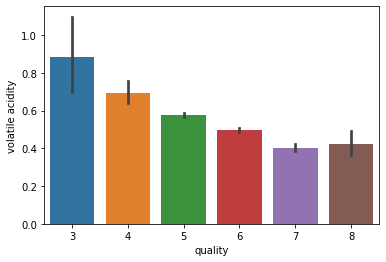

In [9]:
# check how the quality is influenced by volatile acidity
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['volatile acidity'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

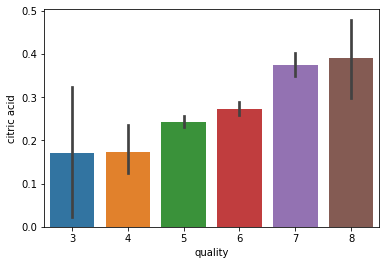

In [10]:
# check how the quality is influenced by citric acid
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

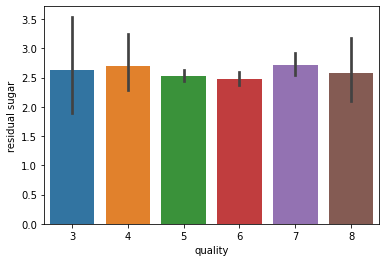

In [11]:
# check how the quality is influenced by residual sugar
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['residual sugar'])

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

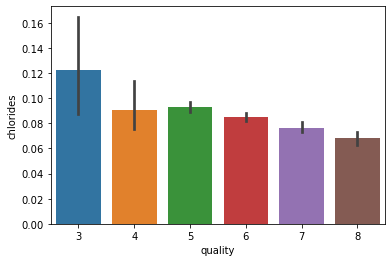

In [12]:
# check how the quality is influenced by chlorides
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['chlorides'])

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

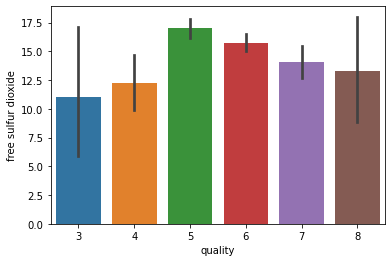

In [13]:
# check how the quality is influenced by free sulfur dioxide
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

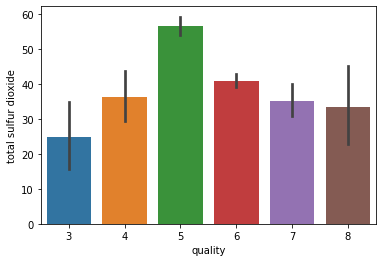

In [14]:
# check how the quality is influenced by total sulfur dioxide
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['total sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='density'>

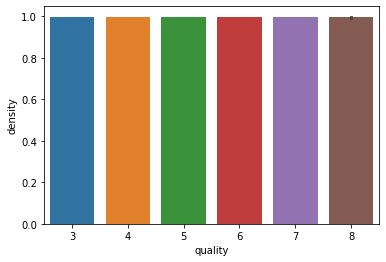

In [15]:
# check how the quality is influenced by density
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['density'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

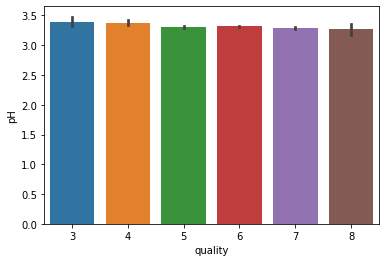

In [16]:
# check how the quality is influenced by pH
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['pH'])

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

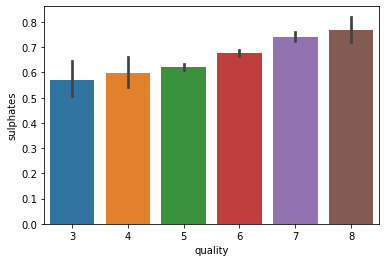

In [17]:
# check how the quality is influenced by sulphates
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['sulphates'])

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

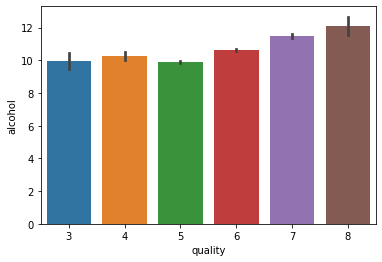

In [18]:
# check how the quality is influenced by alcohol
sns.barplot(x=red_wine_data['quality'], y=red_wine_data['alcohol'])

In [19]:
# 6 Relationship between features & the target - Correlation matrix
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


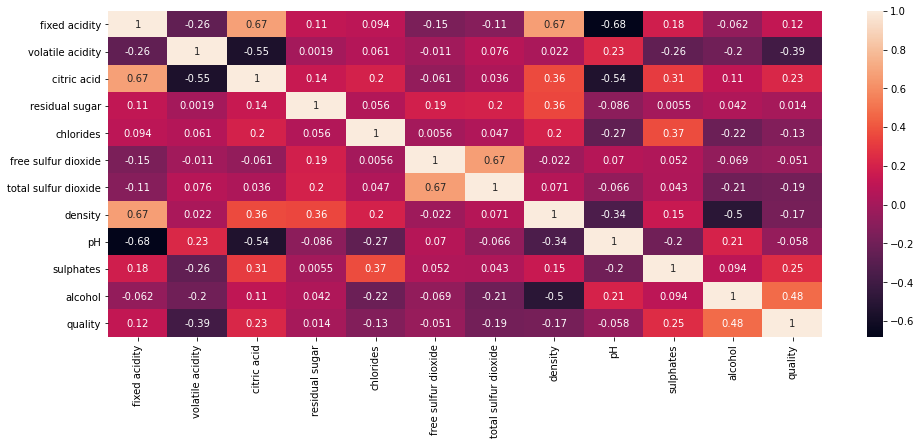

In [20]:
plt.figure(figsize=(16, 6))
sns.heatmap(red_wine_data.corr(), annot=True);

In [21]:
#7. Target: Check for discrete values
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Insights / Sanity Check Conclusions

1. **Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem**
    1. **INSIGHT:** Shape of the data is (1599, 12). i.e., dataset contains ~1600 observations, which is much greater than number of columns (12). Hence we can apply ML techniques rather than statistical rule-based approach.


2. **Datatypes: Check whether all the columns in the given dataset is numeric**
    1. **INSIGHT:** `Dtype` indicates that all columns are numeric
    

3. **Missing Values: Check whether there are missing values**
    1. **INSIGHT:** `Non-Null Count` indicates there are no missing values in the dataset


4. **Zero-variance: Check if there are any zero variance column in the dataset**
    1. **INSIGHT:** No zero-variance columns found in the dataset


5. **Range of numbers in each column: Check if the column values within the dataset are in the same magnitude**
    1. **INSIGHT:** Each column has numbers within the same magnitude or plottable in a graph


6. **Correlation: Check correlation between feature columns & target**
    1. **INSIGHT:** The columns `pH`, `free sulfur dioxide`, `residual sugar` have very weak correlation (0.00 - 0.20)
    2. **INSIGHT:** The columns `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density` have weak correlation (0.20 - 0.40)
    3. ***Note:*** *The barplots and correlation heatmap complement each other and reveal these findings
    4. ***Note:*** *absolute values of correlations were considered*


7. **Other Observations:**
    1. **INSIGHT:** Since (a) the target is given (b) target is continuous (number between 0..10), we can conclude that this is a supervised linear regression problem
    2. **INSIGHT:** The target variable, i.e., `quality` has discrete values which indicates that this can be solved using classification methods also. However we will continue with Linear Regression in this exercise.


### EDA/Preprocessing
_(Based on the insights from the sanity check, we can now determine how to process the data.)_

#### Checklist of STANDARD EDA items

1. Strategy for missing data
    1. Action: No missing data, no action to be taken
    
    
2. Convert categorical to numeric
    1. Action: No Categorical data, no action to be taken
    
    
3. Dimensionality reduction/Drop the identified columns
    1. Action: Drop identified columns in Insights 6A and 6B
    
    
4. Check for Outliers, Normalize data in columns to fit a range (*Optional*)
    1. Action: As per Insights 5A there are no Outliers

#### Approach:
We will follow a 3-step approach as outlined below:

Step 1:
1. First, we will process the complete dataset without dropping any columns.
2. We will build the ML model with the complete data, test and validate the predictions.

Step 2:
1. As per Insights 6A, we will drop the columns that show very weak correlations. These columns are - `pH`, `free sulfur dioxide`, `residual sugar`
2. The dataset will thus have 9 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 3:
1. As per Insights 6B, we will next drop the columns that show weak correlations. These columns are - `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density`
2. The dataset will thus have 4 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 4:
1. Compare the Accuracy of all the three models developed
2. Choose the best model for deployment


#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [22]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 1 train/test shapes:
(1279, 11) (320, 11) (1279,) (320,)


In [23]:
# create and fit a linear regression model
lm_red_wine1 = LinearRegression()
red_model1 = lm_red_wine1.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_red_wine1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [24]:
print(red_model1.coef_)

[ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]


In [25]:
print(red_model1.intercept_)

14.355105195764914


In [26]:
# simple function to compare actual and predicted values
def compare_prediction(y, yhat):
    comp_matrix = pd.DataFrame(zip(y, yhat), columns = ['Actual', 'Predicted'])
    comp_matrix['Err'] = abs(comp_matrix['Actual']-comp_matrix['Predicted'])
    comp_matrix['PctErr'] = comp_matrix['Err']/comp_matrix['Actual'] * 100
    mean_value = np.mean(comp_matrix['PctErr'])
    return comp_matrix, mean_value

In [27]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("Model 1 prediction comparison and mean error:", comp_matrix, mean)

accuracy1 = round((100-mean),2)
print('Model1 accuracy =', accuracy1)

Model 1 prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          5          6    1  20.000000
1          5          6    1  20.000000
2          5          6    1  20.000000
3          6          5    1  16.666667
4          5          5    0   0.000000
...      ...        ...  ...        ...
1274       6          6    0   0.000000
1275       6          6    0   0.000000
1276       4          5    1  25.000000
1277       6          7    1  16.666667
1278       6          7    1  16.666667

[1279 rows x 4 columns] 13.437209129155944
Model1 accuracy = 86.56


#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. Drop pH, free sulfur dioxide, residual sugar columns.
2. Build the ML model, test and validate the predictions.

In [28]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['pH', 'free sulfur dioxide', 'residual sugar']
red_wine_data.drop(lst, axis =1, inplace = True)

In [29]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 8) (320, 8) (1279,) (320,)


In [30]:
# create and fit a linear regression model
lm_red_wine2 = LinearRegression()
red_model2 = lm_red_wine2.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_red_wine2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions] 

In [31]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("Model 2 prediction comparison and mean error:", comp_matrix, mean)

accuracy2 = round((100-mean),2)
print("Model 2 accuracy =", accuracy2)

Model 2 prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          5          6    1  20.000000
1          5          6    1  20.000000
2          5          6    1  20.000000
3          6          5    1  16.666667
4          5          5    0   0.000000
...      ...        ...  ...        ...
1274       6          6    0   0.000000
1275       6          6    0   0.000000
1276       4          5    1  25.000000
1277       6          7    1  16.666667
1278       6          7    1  16.666667

[1279 rows x 4 columns] 13.324118544994212
Model 2 accuracy = 86.68


#### Step 3: Drop columns showing weak correlations (0.2 - 0.4)
1. Drop columns fixed acidity, citric acid, chlorides, total sulfur dioxide, density.
2. Build the ML model, test and validate the predictions.

In [32]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density']
red_wine_data.drop(lst, axis =1, inplace = True)

In [33]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 3) (320, 3) (1279,) (320,)


In [34]:
# create and fit a linear regression model
lm_red_wine3 = LinearRegression()
red_model3 = lm_red_wine3.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_red_wine3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [35]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("Model 3 prediction comparison and mean error:", comp_matrix, mean)

accuracy3 = round((100-mean),2)
print("Model 3 accuracy =", accuracy3)

Model 3 prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          5          6    1  20.000000
1          5          6    1  20.000000
2          5          6    1  20.000000
3          6          5    1  16.666667
4          5          5    0   0.000000
...      ...        ...  ...        ...
1274       6          6    0   0.000000
1275       6          6    0   0.000000
1276       4          5    1  25.000000
1277       6          7    1  16.666667
1278       6          7    1  16.666667

[1279 rows x 4 columns] 13.331750995941755
Model 3 accuracy = 86.67


#### Step 4:

Compare the Accuracy of all the three models developed


In [36]:
print("Model1 Accuracy {}".format(accuracy1))
print("Model2 Accuracy {}".format(accuracy2))
print("Model3 Accuracy {}".format(accuracy3))

Model1 Accuracy 86.56
Model2 Accuracy 86.68
Model3 Accuracy 86.67


#### Choose the best model for deployment.

Since we are getting almost the same accuracy across models, we are going for model3 as it has least number of features.

### Red Wine: Model Saving

In [37]:
# save red_model3 as per analysis
model_file = open('models/red_wine_model.pkl', 'wb')
pickle.dump(obj=red_model3, file=model_file)
model_file.close()

In [38]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/red_wine_model.pkl', 'rb')
lr_model = pickle.load(model_file)
model_file.close()
print(lr_model)

LinearRegression()


## Section 2 - Linear Regression for White Wine Quality
We will follow the same steps as we did for Red Wine analysis.

In [39]:
# Read the white wine quality dataset
white_wine_data = pd.read_csv('datasets/winequality-white.csv', delimiter = ';')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Develop an ML Model as per the Pipeline
Refer to the corresponding red wine section

### Sanity Check

In [40]:
# 1 Shape
white_wine_data.shape

(4898, 12)

In [41]:
# 2 Datatypes
white_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [42]:
# 3 Missing values
white_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [43]:
#4 zero variance column needs to be removed. 
for col in white_wine_data:
    print(col, white_wine_data[col].value_counts().count())

fixed acidity 68
volatile acidity 125
citric acid 87
residual sugar 310
chlorides 160
free sulfur dioxide 132
total sulfur dioxide 251
density 890
pH 103
sulphates 79
alcohol 103
quality 7


In [44]:
# 5. Range of numbers in each column
for i in white_wine_data.columns:
    print("Range of {}: minimum {} & maximum {} " .format(i, white_wine_data[i].min(), white_wine_data[i].max()))

Range of fixed acidity: minimum 3.8 & maximum 14.2 
Range of volatile acidity: minimum 0.08 & maximum 1.1 
Range of citric acid: minimum 0.0 & maximum 1.66 
Range of residual sugar: minimum 0.6 & maximum 65.8 
Range of chlorides: minimum 0.009000000000000001 & maximum 0.34600000000000003 
Range of free sulfur dioxide: minimum 2.0 & maximum 289.0 
Range of total sulfur dioxide: minimum 9.0 & maximum 440.0 
Range of density: minimum 0.98711 & maximum 1.03898 
Range of pH: minimum 2.72 & maximum 3.82 
Range of sulphates: minimum 0.22 & maximum 1.08 
Range of alcohol: minimum 8.0 & maximum 14.2 
Range of quality: minimum 3 & maximum 9 


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

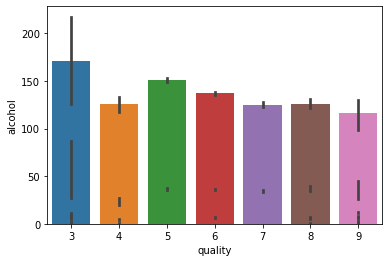

In [45]:
# 6 Relationship between features & the target
# check how the quality is influenced by fixed acidity
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['fixed acidity'])

# check how the quality is influenced by volatile acidity
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['volatile acidity'])

# check how the quality is influenced by citric acid
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['citric acid'])

# check how the quality is influenced by residual sugar
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['residual sugar'])

# check how the quality is influenced by chlorides
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['chlorides'])

# check how the quality is influenced by free sulfur dioxide
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['free sulfur dioxide'])

# check how the quality is influenced by total sulfur dioxide
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['total sulfur dioxide'])

# check how the quality is influenced by density
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['density'])

# check how the quality is influenced by pH
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['pH'])

# check how the quality is influenced by sulphates
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['sulphates'])

# check how the quality is influenced by alcohol
sns.barplot(x=white_wine_data['quality'], y=white_wine_data['alcohol'])

In [46]:
# 6 Relationship between features & the target - Correlation matrix
white_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


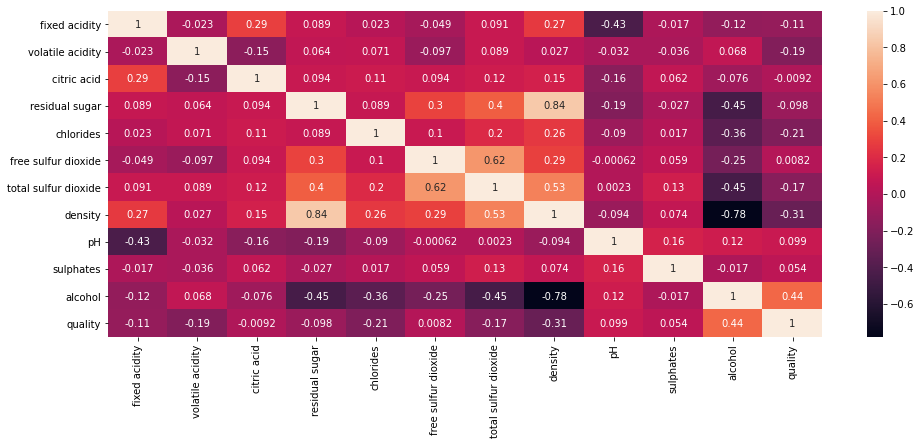

In [47]:
plt.figure(figsize=(16, 6))
sns.heatmap(white_wine_data.corr(), annot=True);

In [48]:
#7. Target: Check for discrete values
white_wine_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Insights / Sanity Check Conclusions


1. **Shape and data sufficiency: Check if there are sufficient rows of data for an ML problem ---> (DONE)**
    1. **INSIGHT:** Shape of the data is (4898, 12), which is much greater than number of columns (12). Hence we can apply ML techniques rather than statistical rule-based approach.


2. **Datatypes: Check whether all the columns in the given dataset is numeric ---> (DONE)**
    1. **INSIGHT:** `Dtype` indicates that all columns are numeric
    

3. **Missing Values: Check whether there are missing values ---->DONE**
    1. **INSIGHT:** `Non-Null Count` indicates there are no missing values in the dataset


4. **Zero-variance: Check if there are any zero variance column in the dataset ---> (DONE)**
    1. **INSIGHT:** No zero-variance columns found in the dataset


5. **Range of numbers in each column: Check if the column values within the dataset are in the same magnitude ---> (DONE)**
    1. **INSIGHT:** Each column has numbers within the same magnitude


6. **Correlation: Check correlation between feature columns & target -->DONE**

    1. **INSIGHT:** The columns `fixed acidity`, `volatile acidity`, `citric acid`,`residual sugar`, `total sulphur dioxide`, `free sulphur dioxide`,`ph`,`sulphates` have very weak correlation (0.00 - 0.20)
    2. **INSIGHT:** The columns `chlorides`, `density` have weak correlation (0.20 - 0.40)
    3. ***Note:*** *The barplots and correlation heatmap complement each other and reveal these findings
    4. ***Note:*** *absolute values of correlations were considered*


7. **Other Observations:**
    1. **INSIGHT:** Since (a) the target is given (b) target is continuous (number between 0..10), we can conclude that this is a supervised linear regression problem
    2. **INSIGHT:** The target variable, i.e., `quality` has discrete values which indicates that this can be solved using classification methods also. However we will continue with Linear Regression in this exercise.


## EDA/Preprocessing
Refer to the EDA steps in the red wine analysis

### Checklist of STANDARD EDA items

1. Strategy for missing data
    1. Action: No missing data, no action to be taken
    
    
2. Convert categorical to numeric
    1. Action: No Categorical data, no action to be taken
    
    
3. Dimensionality reduction/Drop the identified columns
    1. Action: Drop identified columns in Insights 6A and 6B
    
    
4. Check for Outliers, Normalize data in columns to fit a range (*Optional*)
    1. Action: As per Insights 5A there are no Outliers

### White Wine Analysis Approach After Insights:
We will follow a 3-step approach as outlined below:

Step 1:
1. First, we will process the complete dataset without dropping any columns.
2. We will build the ML model with the complete data, test and validate the predictions.

Step 2:
1. As per Insights 6A, we will drop the columns that show very weak correlations. These columns are - `pH`, `free sulfur dioxide`, `residual sugar`
2. The dataset will thus have 9 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 3:
1. As per Insights 6B, we will next drop the columns that show weak correlations. These columns are - `fixed acidity`, `citric acid`, `chlorides`, `total sulfur dioxide`, `density`
2. The dataset will thus have 4 features (including target)
3. We will build the ML model with the remaining data, test and validate the predictions

Step 4:
1. Compare the Accuracy of all the three models developed
2. Choose the best model for deployment


#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [49]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('White Wine Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

White Wine Model 1 train/test shapes:
(3918, 11) (980, 11) (3918,) (980,)


In [50]:
# create and fit a linear regression model
lm_white_wine1 = LinearRegression()
white_model1 = lm_white_wine1.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_white_wine1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [51]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("White Wine Model 1 prediction comparison and mean error:", comp_matrix, mean)

accuracy1 = round((100-mean),2)
print("White Wine Model 1 accuracy =", accuracy1)

White Wine Model 1 prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          6          7    1  16.666667
1          6          6    0   0.000000
2          6          6    0   0.000000
3          6          6    0   0.000000
4          6          6    0   0.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       7          6    1  14.285714
3915       7          6    1  14.285714
3916       6          6    0   0.000000
3917       5          6    1  20.000000

[3918 rows x 4 columns] 13.579409643728196
White Wine Model 1 accuracy = 86.42


#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. drop the columns `fixed acidity`, `volatile acidity`, `citric acid`,`residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`,`pH`,`sulphates`
2. Build the ML model, test and validate the predictions.

In [52]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
       'total sulfur dioxide', 'free sulfur dioxide','pH','sulphates']
white_wine_data.drop(lst, axis=1,inplace=True)

In [53]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('White Wine Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

White Wine Model 2 train/test shapes:
(3918, 3) (980, 3) (3918,) (980,)


In [54]:
# create and fit a linear regression model
lm_white_wine2 = LinearRegression()
white_model2 = lm_white_wine2.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_white_wine2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [55]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("White Wine Model 2 prediction comparison and mean error:", comp_matrix, mean)

accuracy2 = round((100-mean),2)
print("White Wine Model 2 accuracy =", accuracy2)

White Wine Model 2 prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          6          7    1  16.666667
1          6          6    0   0.000000
2          6          6    0   0.000000
3          6          6    0   0.000000
4          6          6    0   0.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       7          6    1  14.285714
3915       7          6    1  14.285714
3916       6          6    0   0.000000
3917       5          6    1  20.000000

[3918 rows x 4 columns] 13.523542137631017
White Wine Model 2 accuracy = 86.48


#### Step 3: Drop columns showing weak correlations (0.2 - 0.4)
1. Drop columns `chlorides` and `density`
2. Build the ML model, test and validate the predictions.

Note: we will be left with just 1 column - i.e., `alcohol` - this doesn't make sense, but let's continue nonetheless.

In [56]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['chlorides', 'density']
white_wine_data.drop(lst, axis=1,inplace=True)

In [57]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3918, 1) (980, 1) (3918,) (980,)


In [58]:
# create and fit a linear regression model
lm_white_wine3 = LinearRegression()
white_model3 = lm_white_wine3.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = lm_white_wine3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [59]:
# compare actual and predicted values
comp_matrix, mean = compare_prediction(y, train_prediction)
print("White Wine Model 3 prediction comparison and mean error:", comp_matrix, mean)

accuracy3 = round((100-mean),2)
print("White Wine Model 3 accuracy =", accuracy3)

White Wine Model 3 prediction comparison and mean error:       Actual  Predicted  Err     PctErr
0          6          6    0   0.000000
1          6          6    0   0.000000
2          6          6    0   0.000000
3          6          6    0   0.000000
4          6          6    0   0.000000
...      ...        ...  ...        ...
3913       6          6    0   0.000000
3914       7          6    1  14.285714
3915       7          6    1  14.285714
3916       6          6    0   0.000000
3917       5          6    1  20.000000

[3918 rows x 4 columns] 13.39785037717664
White Wine Model 3 accuracy = 86.6


#### Step 4:

Compare the Accuracy of all the three models developed


In [60]:
print("Model1 Accuracy {}".format(accuracy1))
print("Model2 Accuracy {}".format(accuracy2))
print("Model3 Accuracy {}".format(accuracy3))

Model1 Accuracy 86.42
Model2 Accuracy 86.48
Model3 Accuracy 86.6


#### Choose the best model for deployment.
Model 3 predicts the quality using just 1 column - i.e., `alcohol` - this doesn't make sense. We will be conservative and choose Model 1 for the way forward.

### White Wine Model Saving

In [61]:
# save white_model1 as per analysis
model_file = open('models/white_wine_model.pkl','wb')
pickle.dump(white_model1, model_file)
model_file.close()

In [62]:
# reload the model from disk and check if it is saved properly
model_file = open('models/white_wine_model.pkl', 'rb')
lr_model = pickle.load(model_file)
model_file.close()
print(lr_model)

LinearRegression()


# Section 3: Logistic Regression for Red Wine Quality

Build the ML model with the complete data, test and validate the predictions.

In [63]:
# read the original csv
red_wine_data = pd.read_csv('datasets/winequality-red.csv', delimiter =';')

In [64]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression 
# create and fit a logistic regression model

classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier.predict(X_train)

#Predicting the test set result  
y_pred= classifier.predict(X_test)  
#len(y_pred)
#threshold = 0.5

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
y_pred[:10]

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6], dtype=int64)

In [67]:
print(classifier.coef_)

[[ 9.29741916e-02  1.28553544e-01 -2.26159381e-02  7.66725198e-02
   1.42404011e-02  5.38427612e-02 -5.43495332e-02 -1.86548040e-03
   1.29450129e-02 -2.96029781e-02 -2.16341772e-01]
 [-2.65617319e-01  2.09122288e-01 -9.15740403e-02  1.65060588e-01
   1.40781046e-02 -4.12047160e-02  1.15795491e-02  3.06404934e-02
   1.73570537e-01 -5.22884256e-02  6.97778081e-02]
 [ 1.61575260e-01  1.01693423e+00 -5.27959944e-01 -7.67949726e-02
   1.03540541e-01 -2.93180564e-02  3.15656365e-02  5.16576538e-01
   1.80723210e+00 -4.32656891e-01 -6.92460594e-01]
 [ 4.09905372e-02 -4.00220523e-01  6.12222681e-02 -1.07093243e-01
  -3.42596304e-02  6.73938920e-03  1.16104728e-02 -9.25203227e-02
  -2.87448696e-01  2.34869866e-01  2.52654166e-01]
 [ 1.15220933e-02 -8.64495492e-01  5.07437264e-01 -3.99089742e-02
  -8.37901596e-02  1.38550811e-02 -1.35330310e-03 -3.88378179e-01
  -1.44467536e+00  2.62909590e-01  6.00851883e-01]
 [-4.14447635e-02 -8.98940492e-02  7.34903904e-02 -1.79359189e-02
  -1.38092562e-02 -

In [68]:
print(classifier.intercept_)

[-0.00249388  0.0311685   0.52036954 -0.09427868 -0.38978167 -0.06498383]


In [69]:
y_pred.min(), y_pred.max()

(5, 7)

In [70]:
yp_df=pd.DataFrame(zip(y_pred, y_test), columns=['pred', 'act'])

for v in range(y_pred.min(), y_pred.max()+1):
    
    print(f'predicted quality = {v}:')
    pred_arr = yp_df[yp_df['pred']==v]['pred']
    count = pred_arr.value_counts()[v]
    print(f'  prediction count = {count}')
    
    act_arr = yp_df[yp_df['act']==v]['act']
    count = act_arr.value_counts()[v]
    print(f'  actual count = {count}')

    print()

predicted quality = 5:
  prediction count = 157
  actual count = 130

predicted quality = 6:
  prediction count = 160
  actual count = 132

predicted quality = 7:
  prediction count = 3
  actual count = 42



In [71]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(3,9)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm

,3,4,5,6,7,8
3,0,0,1,0,0,0
4,0,0,9,1,0,0
5,0,0,94,36,0,0
6,0,0,49,81,2,0
7,0,0,4,37,1,0
8,0,0,0,5,0,0


In [72]:
probs_arr = classifier.predict_proba(X_test)
probs_df = pd.DataFrame(probs_arr, columns=coords)
probs_df.head(10)

,3,4,5,6,7,8
0,0.002657,0.033015,0.597887,0.304528,0.052167,0.009746
1,0.000036,0.008106,0.854415,0.126491,0.008960,0.001993
2,0.008376,0.013398,0.525446,0.368094,0.075481,0.009206
3,0.003430,0.013120,0.484389,0.416118,0.074552,0.008392
4,0.006252,0.043021,0.265797,0.528453,0.142402,0.014075
5,0.001292,0.013316,0.632878,0.308443,0.037781,0.006289
6,0.000001,0.005688,0.889961,0.098292,0.005149,0.000909
7,0.011992,0.053148,0.549005,0.309726,0.062060,0.014068
8,0.006695,0.031093,0.394516,0.443414,0.110472,0.013811
9,0.008570,0.063067,0.276854,0.511173,0.125249,0.015088


In [73]:
y_pred.min(), y_pred.max()

(5, 7)

In [74]:
y_pred_proba = probs_df.idxmax(axis=1)

In [75]:
#Comparing the wine quality, Actual vs Predicted vs Proba
comp_df = pd.DataFrame(zip(y_test,y_pred,y_pred_proba,),columns= ['actual','predicted','probability'])
comp_df

,actual,predicted,probability
0,6,5,5
1,5,5,5
2,6,5,5
3,5,5,5
4,6,6,6
...,...,...,...
315,6,6,6
316,5,5,5
317,5,5,5
318,6,6,6


In [76]:
score = classifier.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.55


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold

scores = cross_val_score(classifier, X_train, y_train, cv=3)
print('Cross-Validation Accuracy Scores', scores.mean())

Cross-Validation Accuracy Scores 0.5840764074428355


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [78]:
kfold = KFold(n_splits=5)
model = LogisticRegression(C=5)
results = cross_val_score(model,X,y,cv=kfold)
print(results)
print("Accuracy:",results.mean()*100)

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.6        0.503125   0.565625   0.559375   0.63009404]
Accuracy: 57.16438087774295


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()


(0.550351288056206, 0.5840764074428355, 0.6220657276995305)

In [80]:
classifier.score(X,y)

0.5822388993120701

# model accuracy using logistic regerssion(using all fields) = 58.03
# model accuracy using linear regression (using all fields) = 86.56

In [81]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

In [82]:
print("train_accuracy", train_accuracy)

train_accuracy 0.5903049257232212


In [83]:
print("test_accuracy",test_accuracy)

test_accuracy 0.55


#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. Drop pH, free sulfur dioxide, residual sugar columns.
2. Build the ML model, test and validate the predictions.

In [84]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['pH', 'free sulfur dioxide', 'residual sugar']
red_wine_data.drop(lst, axis =1, inplace = True)

In [85]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 8) (320, 8) (1279,) (320,)


In [86]:
# create and fit a Logistic regression model
classifier2= LogisticRegression(random_state=0)  
classifier2.fit(X_train, y_train)  


# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions] 

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
#Predicting the test set result  
y_pred= classifier2.predict(X_test)  
len(y_pred)


320

In [88]:
print(classifier2.coef_)

[[ 2.04324901e-01  2.32097024e-01 -3.96244375e-02  2.60311269e-02
  -1.67962846e-02  1.03653006e-03 -4.96830933e-02 -3.22980535e-01]
 [-3.20613939e-01  3.74508961e-01 -1.33662638e-01  2.74879049e-02
   5.80538762e-03  5.54754269e-02 -9.92936668e-02  1.49613254e-01]
 [ 1.88496912e-01  2.14045497e+00 -1.06115218e+00  2.08047953e-01
   2.37748374e-02  1.15959172e+00 -7.51390677e-01 -3.21378389e-01]
 [ 4.39357715e-02 -8.96221164e-01  9.92176484e-02 -7.62809509e-02
   8.09496267e-03 -2.62282914e-01  4.45525214e-01  1.94411668e-01]
 [-5.81937313e-02 -1.68475451e+00  9.98377961e-01 -1.60272892e-01
  -5.56638569e-03 -8.34735511e-01  4.25856218e-01  3.31467605e-01]
 [-5.79499145e-02 -1.66085281e-01  1.36843643e-01 -2.50131423e-02
  -1.53125174e-02 -1.19085250e-01  2.89860049e-02 -3.11336039e-02]]


In [89]:
print(classifier2.intercept_)

[-1.06831686e-04  5.60084528e-02  1.16824257e+00 -2.64862906e-01
 -8.39112245e-01 -1.20169036e-01]


In [90]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,10,0,0,0
2,0,0,95,35,0,0
3,0,0,46,86,0,0
4,0,0,4,38,0,0
5,0,0,0,5,0,0


In [91]:
score = classifier2.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.565625


In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier2, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

Cross-Validation Accuracy Scores [0.5        0.5625     0.5703125  0.53125    0.6015625  0.6015625
 0.5078125  0.609375   0.6640625  0.58267717]


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5, 0.5731114665354331, 0.6640625)

#### Step 3: Drop columns showing weak correlations (0.2 - 0.4)
1. Drop columns fixed acidity, citric acid, chlorides, total sulfur dioxide, density.
2. Build the ML model, test and validate the predictions.

In [94]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density']
red_wine_data.drop(lst, axis =1, inplace = True)

In [95]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

X = object.fit_transform(X)
print(X)


[[ 0.96187667 -0.57920652 -0.96024611]
 [ 1.96744245  0.1289504  -0.58477711]
 [ 1.29706527 -0.04808883 -0.58477711]
 ...
 [-0.09955388  0.54204194  0.54162988]
 [ 0.65462046  0.30598963 -0.20930812]
 [-1.21684919  0.01092425  0.54162988]]


In [96]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 3) (320, 3) (1279,) (320,)


In [97]:
# create and fit a logistic regression model
classifier3 = LogisticRegression()
red_model3 = classifier3.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
#Predicting the test set result  
y_pred= classifier3.predict(X_test)  
len(y_pred)


320

In [99]:
print(classifier3.coef_)

[[ 2.66676133 -0.51682152 -0.32849756]
 [ 2.04410832 -0.82897512 -0.08438844]
 [ 1.00853703 -0.89650639 -0.80499519]
 [-0.964461    0.61837941  0.1753076 ]
 [-3.08347379  1.55427815  0.86040245]
 [-1.67147188  0.06964547  0.18217115]]


In [100]:
print(classifier3.intercept_)

[ 0.17634707 -0.17231356 10.34740715  0.31522574 -8.11280204 -2.55386436]


In [101]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm

,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,10,0,0,0
2,0,0,104,25,1,0
3,0,0,58,67,7,0
4,0,0,3,33,6,0
5,0,0,0,2,3,0


In [102]:
score = classifier3.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.553125


In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier3, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

Cross-Validation Accuracy Scores [0.5234375  0.5390625  0.5234375  0.5        0.609375   0.546875
 0.6171875  0.59375    0.6953125  0.61417323]


C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5, 0.5762610728346457, 0.6953125)

In [105]:
print("Model1 Accuracy {}".format(57.5))
print("Model2 Accuracy {}".format(57.34))
print("Model3 Accuracy {}".format(57.62))

Model1 Accuracy 57.5
Model2 Accuracy 57.34
Model3 Accuracy 57.62


#### Choose the best model for deployment.

Since we are getting highest accuracy for model3, we are going for model3 .

In [106]:
# save red_model3 as per analysis
model_file = open('models/red_wine_model.pkl', 'wb')
pickle.dump(obj=red_model3, file=model_file)
model_file.close()

In [107]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/red_wine_model.pkl', 'rb')
log_model = pickle.load(model_file)
model_file.close()
print(log_model)

LogisticRegression()


# Section4 : Logistic Regression for White Wine Quality
We will follow the same steps as we did for Red Wine analysis.

In [108]:
# Read the white wine quality dataset
white_wine_data = pd.read_csv('datasets/winequality-white.csv', delimiter = ';')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [109]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']


In [110]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [111]:
# split the features and target data sets into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Model 1 train/test shapes:
(3918, 11) (980, 11) (3918,) (980,)


In [112]:
white_wine_1 = LogisticRegression()
white_wine_1.fit(X_train, y_train)

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_1.predict(X_train)

#Predicting the test set result  
y_pred= white_wine_1.predict(X_test)  
len(y_pred)


980

In [114]:
print(white_wine_1.coef_)

[[ 0.78870098  0.52529831 -0.00785662 -0.34421507  0.50549466  0.47555119
  -0.21816463 -0.09347511  0.27353253 -0.33535537 -0.43357062]
 [-0.35474355  0.63632532  0.00945571 -1.23225021  0.23781308 -0.79819198
  -0.04235209  1.23635196 -0.43814619 -0.09459522 -0.58458567]
 [-0.48999776  0.26025679  0.00785547 -0.51009212  0.21232547 -0.24675766
   0.21006258  0.66336996 -0.48909161 -0.0777208  -0.88963304]
 [-0.61466169 -0.33751115  0.01467572 -0.25305197  0.26981254 -0.08308484
   0.10158531  0.69224076 -0.47268725  0.05345017  0.24284347]
 [-0.15482669 -0.5161184  -0.10612206  0.90604167 -0.05262678  0.02935968
   0.06790393 -0.973062   -0.03282514  0.27820524  0.16873011]
 [-0.22702883 -0.46274543 -0.0408291   1.11317768  0.23004771  0.28076161
   0.11615552 -0.94180722 -0.0287224   0.22382995  0.61499828]
 [ 1.05255754 -0.10550544  0.12282088  0.32039001 -1.40286668  0.34236199
  -0.23519063 -0.58361835  1.18794005 -0.04781396  0.88121748]]


In [115]:
print(white_wine_1.intercept_)

[-2.44114718 -0.14504851  2.52681246  3.24514522  1.87667959  0.09504709
 -5.15748868]


In [116]:
y_pred.min(), y_pred.max()

(4, 9)

In [117]:
y_test.min(),y_test.max()

(3, 8)

In [118]:
yp_df=pd.DataFrame(zip(y_pred, y_test), columns=['pred', 'act'])

In [119]:
yp_df.head()

,pred,act
0,6,7
1,6,8
2,6,8
3,6,5
4,6,7


In [120]:
len(yp_df[yp_df['pred']==3]['pred'])

0

In [121]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(3,10)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm

,3,4,5,6,7,8,9
3,0,0,2,2,0,1,0
4,0,1,12,12,0,0,0
5,0,1,151,137,1,1,0
6,0,0,80,323,28,0,1
7,0,0,13,133,46,0,0
8,0,0,2,25,8,0,0
9,0,0,0,0,0,0,0


#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. drop the columns `fixed acidity`, `volatile acidity`, `citric acid`,`residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`,`pH`,`sulphates`
2. Build the ML model, test and validate the predictions.

In [122]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
       'total sulfur dioxide', 'free sulfur dioxide','pH','sulphates']
white_wine_data.drop(lst, axis=1,inplace=True)

In [123]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']



In [124]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

[[-0.035355    2.33151201 -1.39315246]
 [ 0.14774708 -0.00915417 -0.82427568]
 [ 0.1935226   0.3586648  -0.33666701]
 ...
 [-0.21845708 -0.49735026 -0.90554379]
 [-1.08819196 -1.78471666  1.85757201]
 [-1.179743   -1.54396243  1.04489089]]


In [125]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('White Wine Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

White Wine Model 2 train/test shapes:
(3918, 3) (980, 3) (3918,) (980,)


In [126]:
# create and fit a logistic regression model
white_wine_2 = LogisticRegression()
white_wine_2 = white_wine_2.fit(X_train, y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

C:\Users\saicb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_2.predict(X_train)

#Predicting the test set result  
y_pred= white_wine_2.predict(X_test)  
len(y_pred)

980

In [128]:
print(white_wine_2.coef_)

[[ 0.43907204  0.08741856 -0.08418981]
 [ 0.30954095 -0.38899752 -0.85038896]
 [ 0.25051994 -0.13402059 -1.15974526]
 [ 0.24207257  0.09872153 -0.06776652]
 [-0.15936627  0.0451491   0.45616884]
 [ 0.11672762  0.21616494  0.85473116]
 [-1.19856685  0.07556398  0.85119054]]


In [129]:
print(white_wine_2.intercept_)

[-2.02837577  0.12758286  2.07471917  2.75807151  1.52362999 -0.19453009
 -4.26109768]


In [130]:
y_pred.min(), y_pred.max()

(5, 7)

In [131]:
y_test.min(),y_test.max()

(3, 8)

In [132]:
yp_df = pd.DataFrame(zip(y_pred,y_test), columns = ["Predicted","Actual"])
yp_df

,Predicted,Actual
0,6,7
1,7,8
2,6,8
3,6,5
4,6,7
...,...,...
975,6,6
976,6,6
977,6,6
978,5,5


In [133]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm

,3,4,5,6,7,8
0,0,0,1,4,0,0
1,0,0,12,13,0,0
2,0,0,151,139,1,0
3,0,0,113,297,22,0
4,0,0,20,141,31,0
5,0,0,2,24,9,0


# Decision Tree

# Section5 : Decision Tree for Red Wine Quality

#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [134]:
# read the dataset

red_wine_data = pd.read_csv('datasets/winequality-red.csv', delimiter =';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [135]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']



In [136]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)


[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [137]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 1 train/test shapes:
(1279, 11) (320, 11) (1279,) (320,)


In [138]:
# create and fit a Decision tree model

from sklearn.tree import DecisionTreeClassifier  

classifier = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
classifier.fit(X_train,y_train)

# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier.predict(X_test)

In [139]:
y_pred.min(), y_pred.max()

(5, 7)

In [140]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(3,9)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm

,3,4,5,6,7,8
3,0,0,1,0,0,0
4,0,0,8,2,0,0
5,0,0,118,11,1,0
6,0,0,82,41,9,0
7,0,0,9,23,10,0
8,0,0,0,1,4,0


In [141]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.528125

Visualizing Decision Tree in the Tree Structure

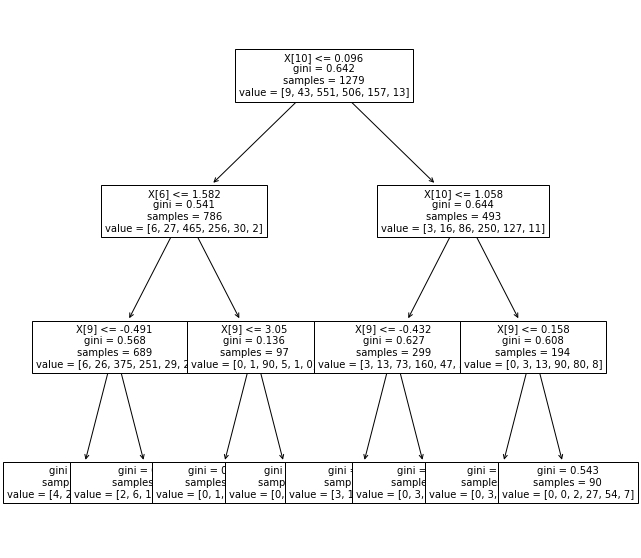

In [142]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, fontsize=10)
plt.show()

In [143]:
score = classifier.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.528125


#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. Drop pH, free sulfur dioxide, residual sugar columns.
2. Build the ML model, test and validate the predictions.

In [144]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['pH', 'free sulfur dioxide', 'residual sugar']
red_wine_data.drop(lst, axis =1, inplace = True)

In [145]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']


X = object.fit_transform(X)
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  0.55827446 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ...  0.02826077  0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ...  0.13426351 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ... -0.53355375  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ... -0.67665745  0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ... -0.66605717  0.01092425
   0.54162988]]


In [146]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 8) (320, 8) (1279,) (320,)


In [147]:
# create and fit a Decision tree model

from sklearn.tree import DecisionTreeClassifier  
#classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  



classifier2 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
classifier2.fit(X_train,y_train)
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier2.predict(X_test)

In [148]:
y_pred.min(), y_pred.max()

(5, 7)

In [149]:
score = classifier2.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.528125


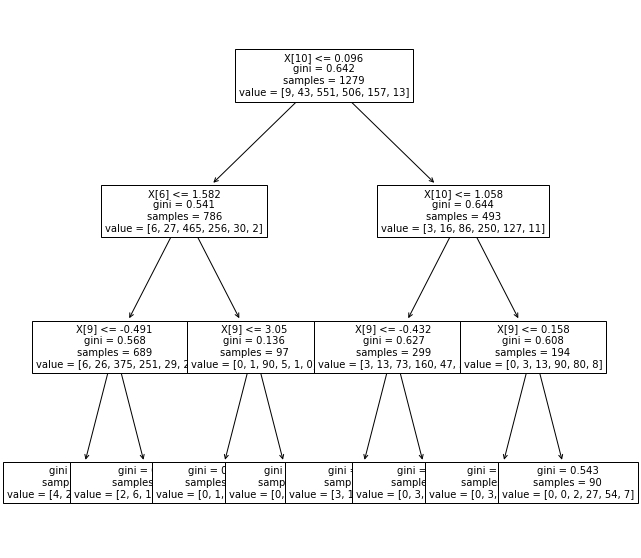

In [150]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, fontsize=10)
plt.show()

#### Step 3: Drop columns showing weak correlations (0.2 - 0.4)
1. Drop columns fixed acidity, citric acid, chlorides, total sulfur dioxide, density.
2. Build the ML model, test and validate the predictions.

In [151]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density']
red_wine_data.drop(lst, axis =1, inplace = True)

In [152]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

X = object.fit_transform(X)
print(X)

[[ 0.96187667 -0.57920652 -0.96024611]
 [ 1.96744245  0.1289504  -0.58477711]
 [ 1.29706527 -0.04808883 -0.58477711]
 ...
 [-0.09955388  0.54204194  0.54162988]
 [ 0.65462046  0.30598963 -0.20930812]
 [-1.21684919  0.01092425  0.54162988]]


In [153]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 3) (320, 3) (1279,) (320,)


In [154]:
# create and fit a Decision tree model

from sklearn.tree import DecisionTreeClassifier  
#classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  



classifier3 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
classifier3.fit(X_train,y_train)
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier3.predict(X_test)

In [155]:
y_pred.min(), y_pred.max()

(5, 7)

In [156]:
y_test.min(), y_test.max()

(3, 8)

In [157]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm



,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,8,2,0,0
2,0,0,107,22,1,0
3,0,0,63,60,9,0
4,0,0,5,27,10,0
5,0,0,0,1,4,0


In [158]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.553125

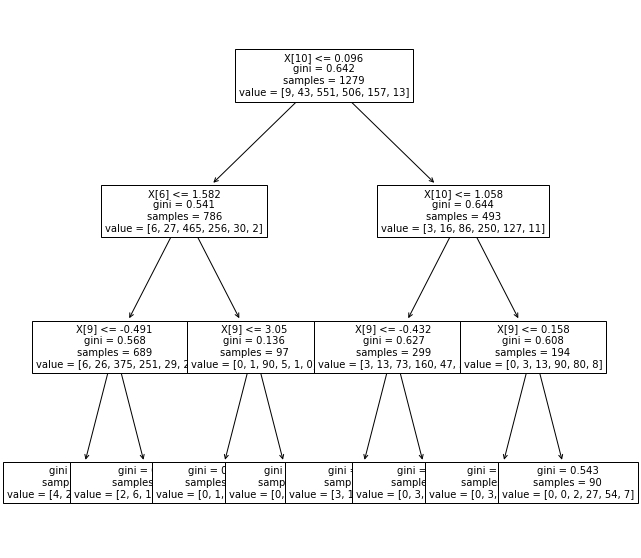

In [159]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, fontsize=10)
plt.show()

#### Choose the best model for deployment.

Since we are getting highest accuracy for model3, we are going for model3 .

In [160]:
# save red_model3 as per analysis
model_file = open('models/red_wine_model.pkl', 'wb')
pickle.dump(obj=classifier3, file=model_file)
model_file.close()

In [161]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/red_wine_model.pkl', 'rb')
decision_model = pickle.load(model_file)
model_file.close()
print(decision_model)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)


## Section 6 - White Wine Analysis, Model Creation and Saving
We will follow the same steps as we did for Red Wine analysis.

In [162]:
# Read the white wine quality dataset
white_wine_data = pd.read_csv('datasets/winequality-white.csv', delimiter = ';')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [163]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']

In [164]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [165]:
# split the features and target data sets into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Model 1 train/test shapes:
(3918, 11) (980, 11) (3918,) (980,)


In [166]:
# create and fit a Decision tree model

from sklearn.tree import DecisionTreeClassifier  
#white_wine_cassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  



white_wine_classifier1 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
white_wine_classifier1.fit(X_train,y_train)
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_classifier1.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = white_wine_classifier1.predict(X_test)

In [167]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_classifier1.predict(X_train)

#Predicting the test set result  
y_pred= white_wine_classifier1.predict(X_test)  
len(y_pred)

980

In [168]:
y_pred.min(), y_pred.max()

(5, 7)

In [169]:
y_test.min(),y_test.max()

(3, 8)

In [170]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm

,3,4,5,6,7,8
0,0,0,1,4,0,0
1,0,0,11,14,0,0
2,0,0,142,148,1,0
3,0,0,88,323,21,0
4,0,0,4,154,34,0
5,0,0,0,26,9,0


In [171]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.5091836734693878

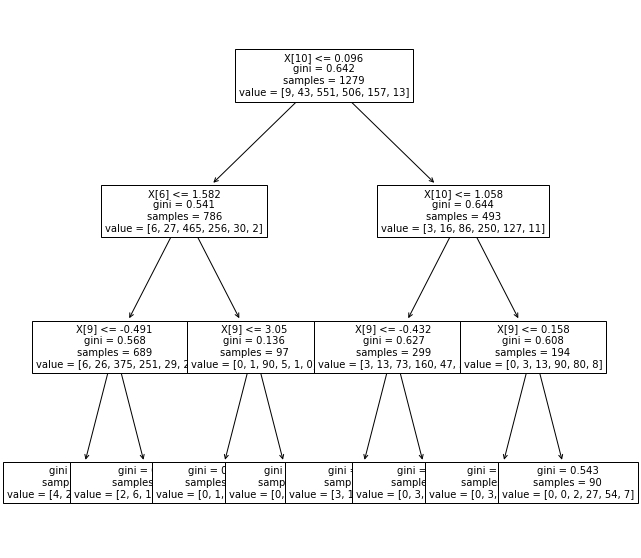

In [172]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, fontsize=10)
plt.show()

#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. drop the columns `fixed acidity`, `volatile acidity`, `citric acid`,`residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`,`pH`,`sulphates`
2. Build the ML model, test and validate the predictions.

In [173]:
#3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
       'total sulfur dioxide', 'free sulfur dioxide','pH','sulphates']
white_wine_data.drop(lst, axis=1,inplace=True)

In [174]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']


In [175]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

[[-0.035355    2.33151201 -1.39315246]
 [ 0.14774708 -0.00915417 -0.82427568]
 [ 0.1935226   0.3586648  -0.33666701]
 ...
 [-0.21845708 -0.49735026 -0.90554379]
 [-1.08819196 -1.78471666  1.85757201]
 [-1.179743   -1.54396243  1.04489089]]


In [176]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('White Wine Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

White Wine Model 2 train/test shapes:
(3918, 3) (980, 3) (3918,) (980,)


In [177]:
# create and fit a Decision tree model

from sklearn.tree import DecisionTreeClassifier  
#white_wine_cassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  



white_wine_classifier2 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
white_wine_classifier2.fit(X_train,y_train)
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_classifier2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = white_wine_classifier2.predict(X_test)

In [ ]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = white_wine_classifier2.predict(X_train)

#Predicting the test set result  
y_pred= white_wine_classifier2.predict(X_test)  
len(y_pred)


In [178]:
y_pred.min(), y_pred.max()

(5, 7)

In [179]:
y_test.min(),y_test.max()

(3, 8)

In [180]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm

,3,4,5,6,7,8
0,0,0,1,4,0,0
1,0,0,12,13,0,0
2,0,0,170,120,1,0
3,0,0,133,279,20,0
4,0,0,20,134,38,0
5,0,0,2,22,11,0


In [181]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.4969387755102041

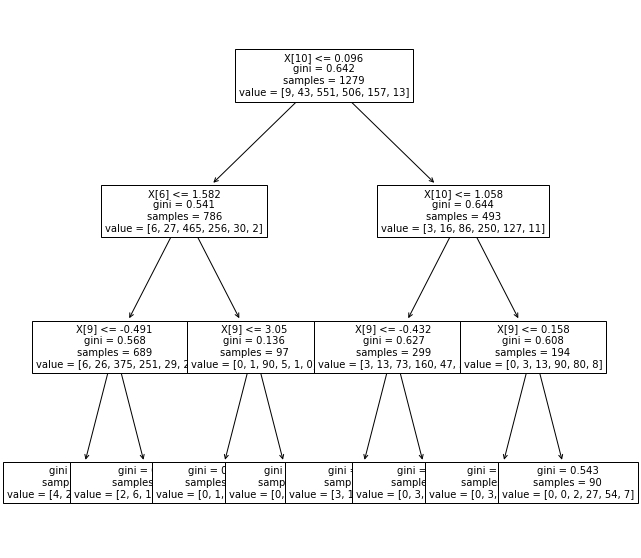

In [182]:
from sklearn import tree
 
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classifier, fontsize=10)
plt.show()

#### Choose the best model for deployment.

Since we are getting highest accuracy for model1, we are going for model1 .

In [184]:
# save white_wine model1 as per analysis
model_file = open('models/white_wine_model.pkl', 'wb')
pickle.dump(obj=white_wine_classifier1, file=model_file)
model_file.close()

In [185]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/white_wine_model.pkl', 'rb')
decision_model = pickle.load(model_file)
model_file.close()
print(decision_model)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)


# Random Forest

## Section 7 - Red Wine Analysis, Model Creation and Saving


In [187]:
# read the dataset

red_wine_data = pd.read_csv('datasets/winequality-red.csv', delimiter =';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

In [189]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

In [190]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 1 train/test shapes:
(1279, 11) (320, 11) (1279,) (320,)


In [191]:
# create and fit a RandomForest model

from sklearn.ensemble import RandomForestClassifier 

classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [192]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier.predict(X_test)

In [193]:
y_pred.min(), y_pred.max()

(4, 7)

In [194]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

In [195]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [198]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 500}

In [200]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=11, criterion='entropy')


In [201]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       n_estimators=500, random_state=42)

In [202]:
pred=rfc1.predict(X_test)

In [203]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.653125


In [204]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(3,9)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm

,3,4,5,6,7,8
3,0,0,1,0,0,0
4,0,0,5,5,0,0
5,0,0,105,24,1,0
6,0,1,35,90,6,0
7,0,0,1,23,18,0
8,0,0,0,2,3,0


In [205]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.665625

Visualizing Random Forest in the Tree Structure

<Figure size 432x288 with 0 Axes>

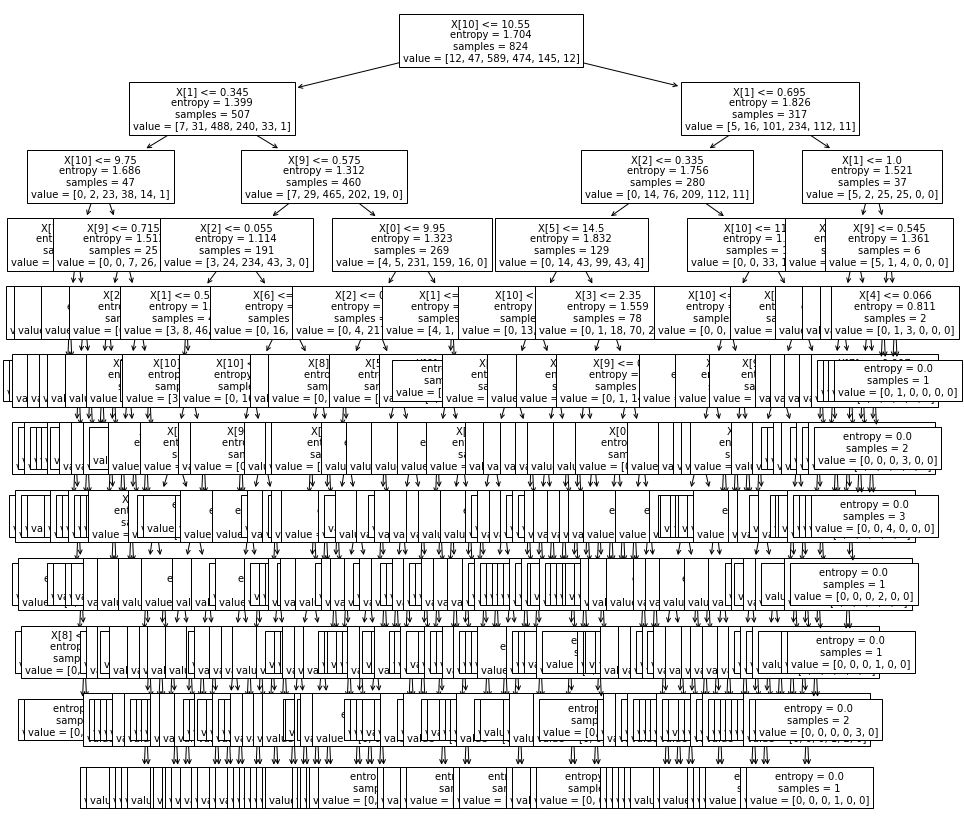

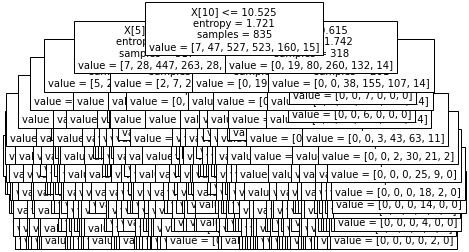

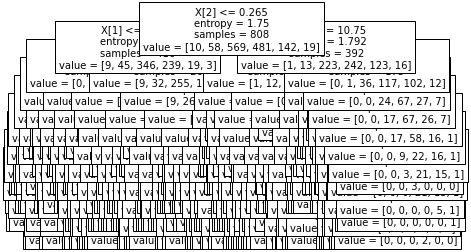

In [206]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))

tree.plot_tree(rfc1.estimators_[5],label='all', fontsize=10)
plt.show()

tree.plot_tree(rfc1.estimators_[8], label='all',fontsize=10)
plt.show()
tree.plot_tree(rfc1.estimators_[3],label='all', fontsize=10)
plt.show()

#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. Drop pH, free sulfur dioxide, residual sugar columns.
2. Build the ML model, test and validate the predictions.

In [207]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['pH', 'free sulfur dioxide', 'residual sugar']
red_wine_data.drop(lst, axis =1, inplace = True)

In [208]:
# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

In [209]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)


[[-0.52835961  0.96187667 -1.39147228 ...  0.55827446 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ...  0.02826077  0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ...  0.13426351 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ... -0.53355375  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ... -0.67665745  0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ... -0.66605717  0.01092425
   0.54162988]]


In [210]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 8) (320, 8) (1279,) (320,)


In [212]:
# create and fit a RandomForest model

from sklearn.ensemble import RandomForestClassifier 

classifier2= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier2.fit(X_train, y_train)  


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [213]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier2.predict(X_test)

In [214]:
y_pred.min(), y_pred.max()

(4, 8)

In [215]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

In [216]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [217]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 500}

In [218]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=11, criterion='entropy')

In [219]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=500,
                       random_state=42)

In [220]:
pred=rfc2.predict(X_test)

In [221]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.65625


In [222]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
coords = [x for x in range(3,9)]
cm = pd.DataFrame(cm,columns=coords, index=coords )
cm

,3,4,5,6,7,8
3,0,0,1,0,0,0
4,0,1,6,3,0,0
5,0,1,100,27,2,0
6,0,2,29,90,11,0
7,0,0,3,20,18,1
8,0,0,0,2,3,0


In [223]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.653125

<Figure size 432x288 with 0 Axes>

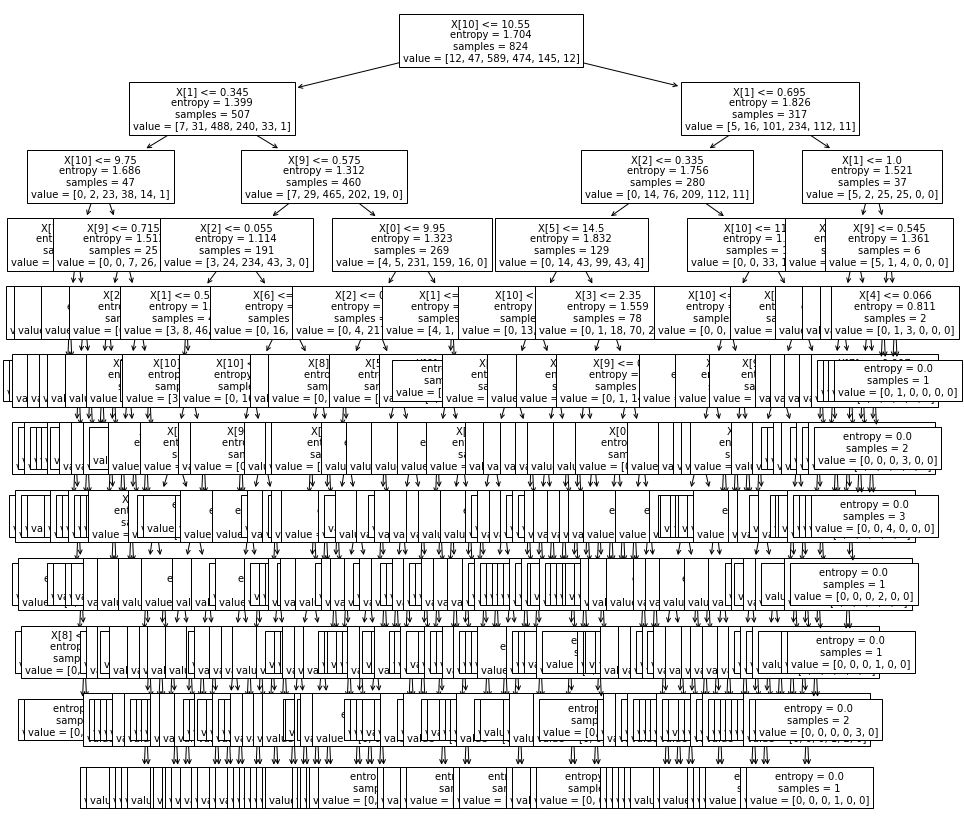

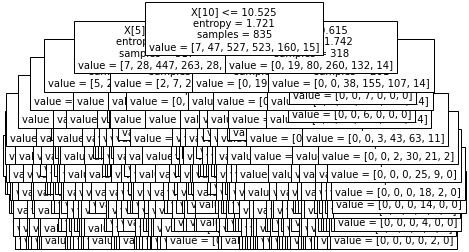

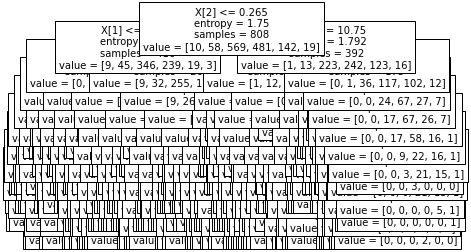

In [224]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))

tree.plot_tree(rfc1.estimators_[5],label='all', fontsize=10)
plt.show()

tree.plot_tree(rfc1.estimators_[8], label='all',fontsize=10)
plt.show()
tree.plot_tree(rfc1.estimators_[3],label='all', fontsize=10)
plt.show()

#### Step 3: Drop columns showing weak correlations (0.2 - 0.4)
1. Drop columns fixed acidity, citric acid, chlorides, total sulfur dioxide, density.
2. Build the ML model, test and validate the predictions.

In [225]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density']
red_wine_data.drop(lst, axis =1, inplace = True)

In [226]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

# create the "features and target" data sets
X = red_wine_data.drop('quality',axis=1)
y = red_wine_data['quality']

X = object.fit_transform(X)
print(X)


[[ 0.96187667 -0.57920652 -0.96024611]
 [ 1.96744245  0.1289504  -0.58477711]
 [ 1.29706527 -0.04808883 -0.58477711]
 ...
 [-0.09955388  0.54204194  0.54162988]
 [ 0.65462046  0.30598963 -0.20930812]
 [-1.21684919  0.01092425  0.54162988]]


In [227]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Model 2 train/test shapes:
(1279, 3) (320, 3) (1279,) (320,)


In [228]:
# create and fit a Random Forest model

from sklearn.ensemble import RandomForestClassifier 

classifier3= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier3.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [229]:
# computing yhat (ie train_predictions) using X (ie train_features)
train_predictions = classifier3.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]
y_pred = classifier3.predict(X_test)

In [230]:
y_pred.min(), y_pred.max()

(3, 8)

In [231]:
y_test.min(), y_test.max()

(3, 8)

In [232]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [4,5,6,7,8],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

In [233]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [234]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'n_estimators': 500}

In [236]:
rfc3=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=11, criterion='gini')

In [237]:
rfc3.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=500,
                       random_state=42)

In [238]:
pred=rfc3.predict(X_test)

In [239]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.596875


In [240]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm



,3,4,5,6,7,8
0,0,0,1,0,0,0
1,0,0,7,3,0,0
2,0,3,99,26,2,0
3,1,1,40,77,13,0
4,0,0,1,20,20,1
5,0,0,0,2,3,0


In [241]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.6125

Visualizing RandomForest

<Figure size 432x288 with 0 Axes>

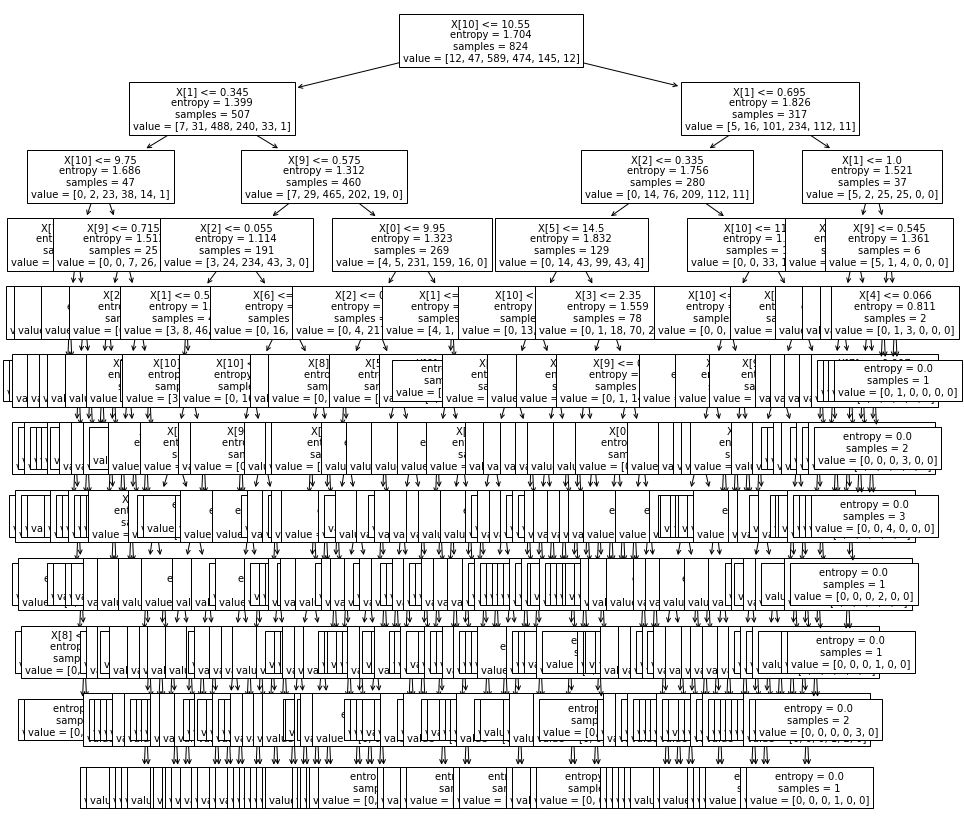

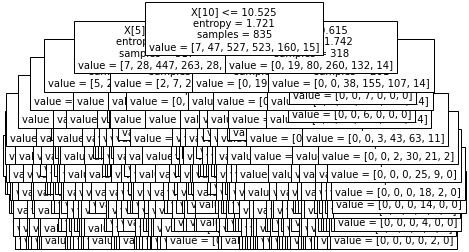

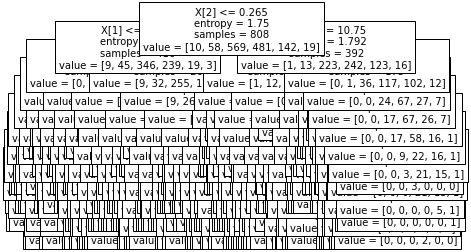

In [242]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))

tree.plot_tree(rfc1.estimators_[5],label='all', fontsize=10)
plt.show()

tree.plot_tree(rfc1.estimators_[8], label='all',fontsize=10)
plt.show()
tree.plot_tree(rfc1.estimators_[3],label='all', fontsize=10)
plt.show()

# Choose the best model for deployment.

Since we are getting highest accuracy for model1, we are going for model1 .

In [243]:
# save red_model3 as per analysis
model_file = open('models/red_wine_model.pkl', 'wb')
pickle.dump(obj=classifier, file=model_file)
model_file.close()

In [244]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/red_wine_model.pkl', 'rb')
RandomForest_model = pickle.load(model_file)
model_file.close()
print(RandomForest_model)

RandomForestClassifier(criterion='entropy', n_estimators=10)


## Section8 - White Wine Analysis, Model Creation and Saving
We will follow the same steps as we did for Red Wine analysis.

In [245]:
# Read the white wine quality dataset
white_wine_data = pd.read_csv('datasets/winequality-white.csv', delimiter = ';')
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [246]:
#### Step 1:
Build the ML model with the complete data, test and validate the predictions.

SyntaxError: invalid syntax (<ipython-input-246-18a71ce361ba>, line 2)

In [247]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']


In [248]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [249]:
# split the features and target data sets into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Model 1 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Model 1 train/test shapes:
(3918, 11) (980, 11) (3918,) (980,)


In [250]:
# create and fit a Random Forest model

from sklearn.ensemble import RandomForestClassifier 

classifier2= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier2.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [251]:
# create and fit a Random forest model
train_predictions =classifier2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]


In [252]:
# computing yhat (ie train_predictions) using X (ie train_features)

y_pred = classifier2.predict(X_test)

In [253]:
y_pred.min(), y_pred.max()

(4, 8)

In [254]:
y_test.min(),y_test.max()

(3, 8)

In [255]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [4,5,6,7,8],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

In [256]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [257]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [258]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=11, criterion='entropy')

In [259]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       n_estimators=200, random_state=42)

In [260]:
pred = rfc1.predict(X_test)

In [261]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6673469387755102


Visualizing Random Forest

<Figure size 432x288 with 0 Axes>

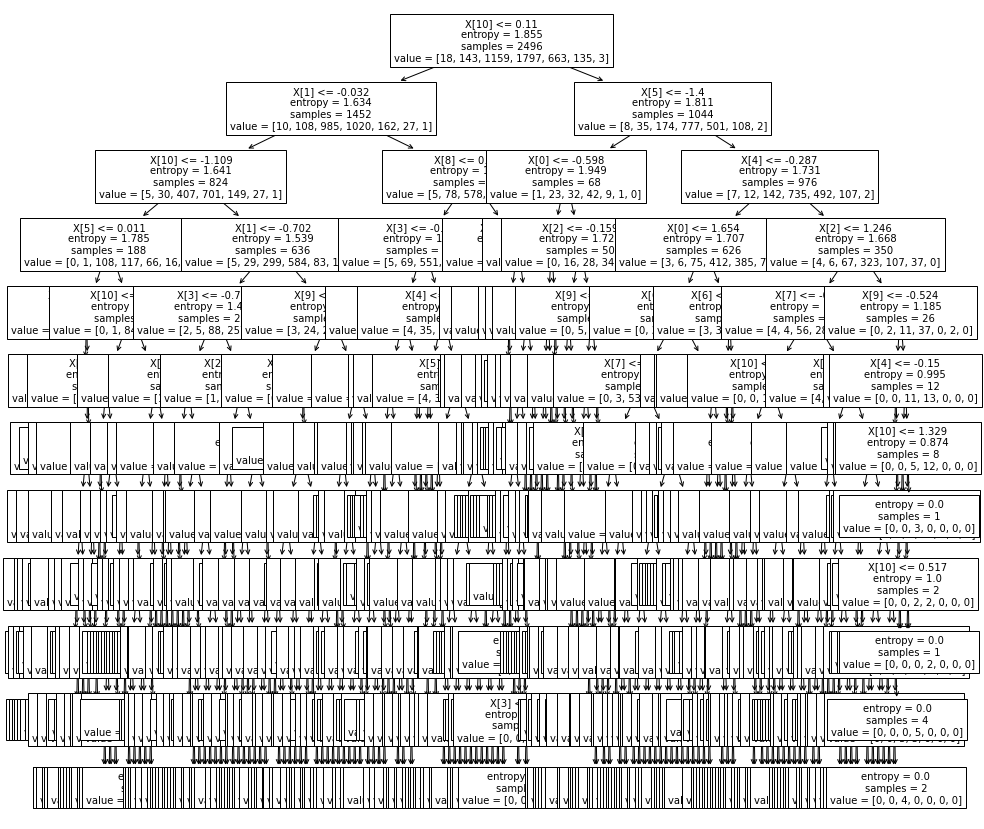

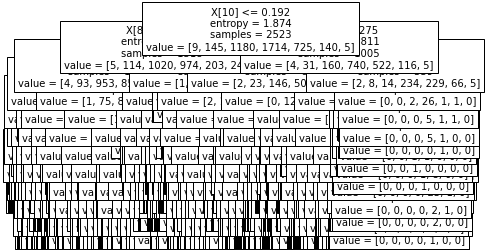

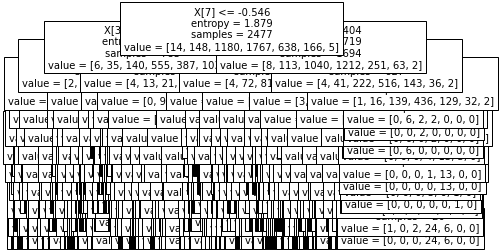

In [262]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))

tree.plot_tree(rfc1.estimators_[5],label='all', fontsize=10)
plt.show()

tree.plot_tree(rfc1.estimators_[8], label='all',fontsize=10)
plt.show()
tree.plot_tree(rfc1.estimators_[3],label='all', fontsize=10)
plt.show()

#### Step 2: Drop columns showing very weak correlations (0.0 - 0.2)
1. drop the columns `fixed acidity`, `volatile acidity`, `citric acid`,`residual sugar`, `total sulfur dioxide`, `free sulfur dioxide`,`pH`,`sulphates`
2. Build the ML model, test and validate the predictions.

In [263]:
### 3. Dimensionality reduction/Drop the identified columns
lst = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar',
       'total sulfur dioxide', 'free sulfur dioxide','pH','sulphates']
white_wine_data.drop(lst, axis=1,inplace=True)

In [ ]:
# create the "features and target" data sets
X = white_wine_data.drop('quality',axis=1)
y = white_wine_data['quality']



In [264]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

X = object.fit_transform(X)
print(X)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -1.24692128e+00
  -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  7.40028640e-01
   1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ...  4.75101984e-01
  -4.36815783e-01 -3.36667007e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -1.31315295e+00
  -2.61552731e-01 -9.05543789e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ...  1.00495530e+00
  -9.62604939e-01  1.85757201e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ...  4.75101984e-01
  -1.48839409e+00  1.04489089e+00]]


In [ ]:
# split the features and target data sets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('White Wine Model 2 train/test shapes:')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [265]:
# create and fit a Random Forest model

from sklearn.ensemble import RandomForestClassifier 

classifier2= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier2.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [266]:
# create and fit a Random forest model
train_predictions =classifier2.predict(X_train)
train_prediction = [int(round(x,0)) for x in train_predictions]

In [267]:
#Predicting the test set result  
y_pred= classifier2.predict(X_test)  
len(y_pred)


980

In [268]:
y_pred.min(), y_pred.max()

(4, 8)

In [269]:
y_test.min(),y_test.max()

(3, 8)

In [270]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    #'max_depth' : [4,5,6,7,8],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

In [271]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=classifier2, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [272]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 200}

In [273]:
rfc2=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=11, criterion='entropy')

In [274]:
rfc2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       n_estimators=200, random_state=42)

In [275]:
pred = rfc2.predict(X_test)

In [276]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6673469387755102


In [277]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  
cm = pd.DataFrame(cm,columns=[x for x in range(3,9)] )
cm

,3,4,5,6,7,8
0,0,0,2,3,0,0
1,0,7,14,3,1,0
2,0,4,199,81,7,0
3,0,3,76,317,36,0
4,0,0,6,74,108,4
5,0,0,1,10,9,15


In [278]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.6591836734693878

Visualization of Random Forest

<Figure size 432x288 with 0 Axes>

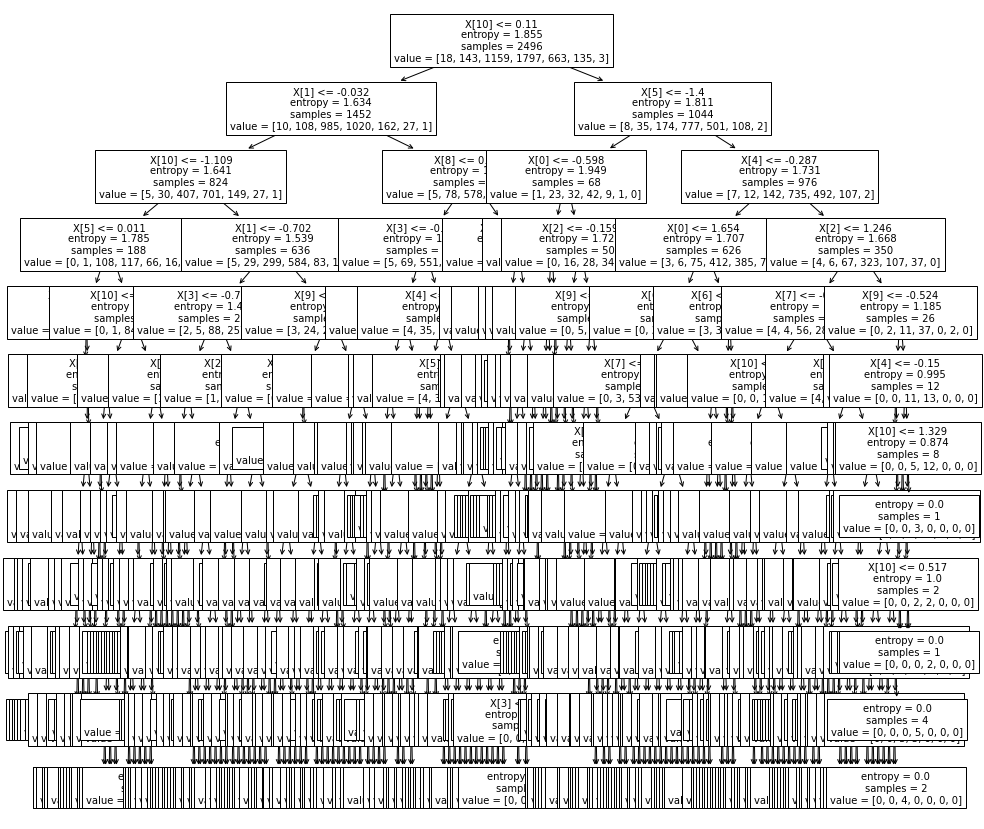

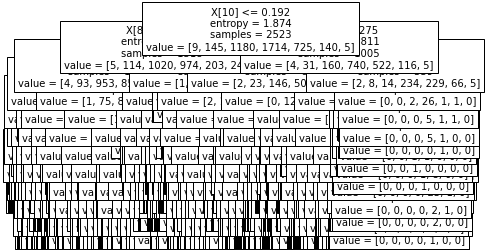

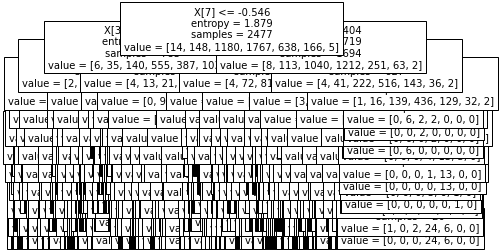

In [279]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))

tree.plot_tree(rfc1.estimators_[5],label='all', fontsize=10)
plt.show()

tree.plot_tree(rfc1.estimators_[8], label='all',fontsize=10)
plt.show()
tree.plot_tree(rfc1.estimators_[3],label='all', fontsize=10)
plt.show()

#### Choose the best model for deployment.

Since we are getting highest accuracy for model1, we are going for model1 .

In [281]:
# save white_wine model1 as per analysis
model_file = open('models/white_wine_model.pkl', 'wb')
pickle.dump(obj=classifier, file=model_file)
model_file.close()

In [282]:
# reload the model from disk and check if it is saved properly.
model_file = open('models/white_wine_model.pkl', 'rb')
decision_model = pickle.load(model_file)
model_file.close()
print(decision_model)

RandomForestClassifier(criterion='entropy', n_estimators=10)
